In [21]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from keras import backend as K
from sklearn import metrics
import matplotlib.pyplot as plt

In [22]:
df = pd.read_csv('Development Index.csv')

In [23]:
df.head()

,Population,Area (sq. mi.),Pop. Density,GDP ($ per capita),Literacy (%),Infant mortality,Development Index
0,9944201,1284000,7.7,1200,47.5,93.82,2
1,5450661,43094,126.5,31100,100.0,4.56,4
2,26783383,437072,61.3,1500,40.4,50.25,2
3,9439,102,92.5,3400,97.0,7.35,4
4,3431932,176220,19.5,12800,98.0,11.95,3


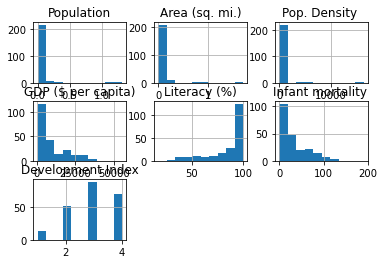

In [24]:
hist = df.hist()

In [25]:
X=df[['Area (sq. mi.)', 'Population', 'GDP ($ per capita)']]  #, 'Literacy (%)', 'Infant mortality ', 'Pop. Density ']]
y=df['Development Index']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [27]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

In [35]:
model = Sequential()
model.add(Dense(9, input_dim=3, activation='elu'))
model.add(Dense(9, activation='elu'))
model.add(Dense(9, activation='elu'))
model.add(Dense(1, activation='sigmoid'))

In [36]:
model.compile(loss='binary_crossentropy', optimizer='adagrad', metrics=['accuracy', recall_m, precision_m])

In [37]:
model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=1)

Epoch 1/100
16/16 [==============================] - 2s 3ms/step - loss: -1163.3916 - accuracy: 0.0964 - recall_m: 1.0000 - precision_m: 1.0000
Epoch 2/100
16/16 [==============================] - 0s 3ms/step - loss: -4128.5453 - accuracy: 0.0294 - recall_m: 1.0000 - precision_m: 1.0000 
Epoch 3/100
16/16 [==============================] - 0s 3ms/step - loss: -4324.0307 - accuracy: 0.0497 - recall_m: 1.0000 - precision_m: 1.0000
Epoch 4/100
16/16 [==============================] - 0s 3ms/step - loss: -957.8991 - accuracy: 0.0775 - recall_m: 1.0000 - precision_m: 1.0000
Epoch 5/100
16/16 [==============================] - 0s 4ms/step - loss: -1001.1805 - accuracy: 0.0453 - recall_m: 1.0000 - precision_m: 1.0000
Epoch 6/100
16/16 [==============================] - 0s 5ms/step - loss: -1094.2999 - accuracy: 0.0637 - recall_m: 1.0000 - precision_m: 1.0000
Epoch 7/100
16/16 [==============================] - 0s 5ms/step - loss: -966.7459 - accuracy: 0.0759 - recall_m: 1.0000 - precision_m: 

In [38]:
_, accuracy, recall, precision = model.evaluate(X_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))

5/5 [==============================] - 1s 2ms/step - loss: -5655.8633 - accuracy: 0.0637 - recall_m: 1.0000 - precision_m: 1.0000
Accuracy: 6.37


In [39]:
predictions = model.predict(X_test)

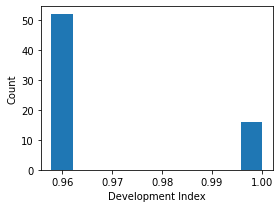

In [40]:
plt.figure(figsize=(4, 3))
plt.hist(predictions)
plt.xlabel('Development Index')
plt.ylabel('Count')
plt.tight_layout()

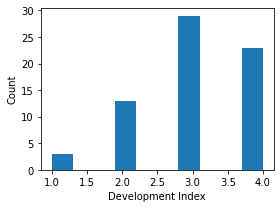

In [41]:
plt.figure(figsize=(4, 3))
plt.hist(y_test)
plt.xlabel('Development Index')
plt.ylabel('Count')
plt.tight_layout()